In [1]:
import os, sys
import numpy as np
import pandas as pd
sys.path.append('../..')
from src import direcslist, load_image, raw_data_path, ImageQuant2
%matplotlib widget

In [2]:
basepath = raw_data_path + '/Imaging/Optogenetics'
paths = direcslist(basepath, 2)

imgs = [load_image(p + '/rfp_channel_flat.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

In [3]:
# Load reference profiles
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
membg1 = np.loadtxt('../../data/calibration_mem1.txt')
membg2 = np.loadtxt('../../data/calibration_mem2.txt')
membg3 = np.loadtxt('../../data/calibration_mem3.txt')
membg4 = np.loadtxt('../../data/calibration_mem4.txt')
membg5 = np.loadtxt('../../data/calibration_mem5.txt')
membg6 = np.loadtxt('../../data/calibration_mem6.txt')

In [4]:
# Global calibration parameterrs
kwargs_dict = {'lr': 0.005, 'descent_steps': 600}

### Quantification 0
Naive - uses error function and gaussian

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<06:29,  1.54it/s]

  2%|█▉                                                                                                           | 11/600 [00:00<00:31, 18.98it/s]

  4%|███▊                                                                                                         | 21/600 [00:00<00:16, 34.60it/s]

  5%|█████▍                                                                                                       | 30/600 [00:00<00:12, 46.10it/s]

  6%|██████▉                                                                                                      | 38/600 [00:01<00:10, 52.75it/s]

  8%|████████▎                                                                                                    | 46/600 [00:01<00:09, 58.85it/s]

  9%|█████████▊                                                                                                   | 54/600 [00:01<00:08, 63.01it/s]

 10%|███████████▎                                                                                                 | 62/600 [00:01<00:08, 66.43it/s]

 12%|████████████▋                                                                                                | 70/600 [00:01<00:07, 68.66it/s]

 13%|██████████████▏                                                                                              | 78/600 [00:01<00:07, 68.79it/s]

 14%|███████████████▌                                                                                             | 86/600 [00:01<00:07, 70.44it/s]

 16%|█████████████████                                                                                            | 94/600 [00:01<00:06, 72.75it/s]

 17%|██████████████████▎                                                                                         | 102/600 [00:01<00:06, 73.63it/s]

 18%|███████████████████▊                                                                                        | 110/600 [00:02<00:06, 75.41it/s]

 20%|█████████████████████▏                                                                                      | 118/600 [00:02<00:06, 74.81it/s]

 21%|██████████████████████▋                                                                                     | 126/600 [00:02<00:06, 75.89it/s]

 22%|████████████████████████                                                                                    | 134/600 [00:02<00:06, 76.48it/s]

 24%|█████████████████████████▌                                                                                  | 142/600 [00:02<00:05, 77.27it/s]

 25%|███████████████████████████▏                                                                                | 151/600 [00:02<00:05, 78.51it/s]

 26%|████████████████████████████▌                                                                               | 159/600 [00:02<00:05, 78.34it/s]

 28%|██████████████████████████████                                                                              | 167/600 [00:02<00:05, 78.41it/s]

 29%|███████████████████████████████▌                                                                            | 175/600 [00:02<00:05, 76.87it/s]

 31%|█████████████████████████████████                                                                           | 184/600 [00:02<00:05, 79.93it/s]

 32%|██████████████████████████████████▋                                                                         | 193/600 [00:03<00:05, 79.85it/s]

 34%|████████████████████████████████████▏                                                                       | 201/600 [00:03<00:05, 79.33it/s]

 35%|█████████████████████████████████████▌                                                                      | 209/600 [00:03<00:05, 77.17it/s]

 36%|███████████████████████████████████████▏                                                                    | 218/600 [00:03<00:04, 77.91it/s]

 38%|████████████████████████████████████████▊                                                                   | 227/600 [00:03<00:04, 78.63it/s]

 39%|██████████████████████████████████████████▎                                                                 | 235/600 [00:03<00:04, 78.63it/s]

 40%|███████████████████████████████████████████▋                                                                | 243/600 [00:03<00:04, 78.61it/s]

 42%|█████████████████████████████████████████████▏                                                              | 251/600 [00:03<00:04, 78.58it/s]

 43%|██████████████████████████████████████████████▌                                                             | 259/600 [00:03<00:04, 78.59it/s]

 44%|████████████████████████████████████████████████                                                            | 267/600 [00:04<00:04, 78.83it/s]

 46%|█████████████████████████████████████████████████▌                                                          | 275/600 [00:04<00:04, 78.08it/s]

 47%|███████████████████████████████████████████████████                                                         | 284/600 [00:04<00:04, 78.52it/s]

 49%|████████████████████████████████████████████████████▌                                                       | 292/600 [00:04<00:03, 78.14it/s]

 50%|██████████████████████████████████████████████████████                                                      | 300/600 [00:04<00:03, 77.63it/s]

 51%|███████████████████████████████████████████████████████▍                                                    | 308/600 [00:04<00:03, 76.30it/s]

 53%|████████████████████████████████████████████████████████▉                                                   | 316/600 [00:04<00:03, 76.29it/s]

 54%|██████████████████████████████████████████████████████████▋                                                 | 326/600 [00:04<00:03, 81.01it/s]

 56%|████████████████████████████████████████████████████████████▎                                               | 335/600 [00:04<00:03, 81.25it/s]

 57%|█████████████████████████████████████████████████████████████▉                                              | 344/600 [00:05<00:03, 80.60it/s]

 59%|███████████████████████████████████████████████████████████████▌                                            | 353/600 [00:05<00:03, 78.82it/s]

 60%|█████████████████████████████████████████████████████████████████▏                                          | 362/600 [00:05<00:02, 80.27it/s]

 62%|██████████████████████████████████████████████████████████████████▉                                         | 372/600 [00:05<00:02, 83.81it/s]

 64%|████████████████████████████████████████████████████████████████████▌                                       | 381/600 [00:05<00:02, 81.83it/s]

 65%|██████████████████████████████████████████████████████████████████████▏                                     | 390/600 [00:05<00:02, 80.99it/s]

 66%|███████████████████████████████████████████████████████████████████████▊                                    | 399/600 [00:05<00:02, 80.23it/s]

 68%|█████████████████████████████████████████████████████████████████████████▍                                  | 408/600 [00:05<00:02, 79.83it/s]

 69%|██████████████████████████████████████████████████████████████████████████▉                                 | 416/600 [00:05<00:02, 79.46it/s]

 71%|████████████████████████████████████████████████████████████████████████████▎                               | 424/600 [00:06<00:02, 78.35it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▊                              | 432/600 [00:06<00:02, 77.57it/s]

 73%|███████████████████████████████████████████████████████████████████████████████▏                            | 440/600 [00:06<00:02, 78.07it/s]

 75%|████████████████████████████████████████████████████████████████████████████████▊                           | 449/600 [00:06<00:01, 78.04it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████▎                         | 457/600 [00:06<00:01, 77.38it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████▋                        | 465/600 [00:06<00:01, 77.39it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████▏                      | 473/600 [00:06<00:01, 77.05it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████▌                     | 481/600 [00:06<00:01, 77.57it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████                    | 489/600 [00:06<00:01, 76.88it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████▍                  | 497/600 [00:06<00:01, 77.19it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▉                 | 505/600 [00:07<00:01, 76.56it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████▎               | 513/600 [00:07<00:01, 77.54it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████▉              | 522/600 [00:07<00:00, 78.84it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████▍            | 530/600 [00:07<00:00, 77.59it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████▊           | 538/600 [00:07<00:00, 76.43it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████▎         | 546/600 [00:07<00:00, 76.87it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████▋        | 554/600 [00:07<00:00, 75.79it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 562/600 [00:07<00:00, 76.80it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 570/600 [00:07<00:00, 77.29it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 579/600 [00:08<00:00, 78.84it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 587/600 [00:08<00:00, 76.40it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████ | 595/600 [00:08<00:00, 72.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 71.97it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

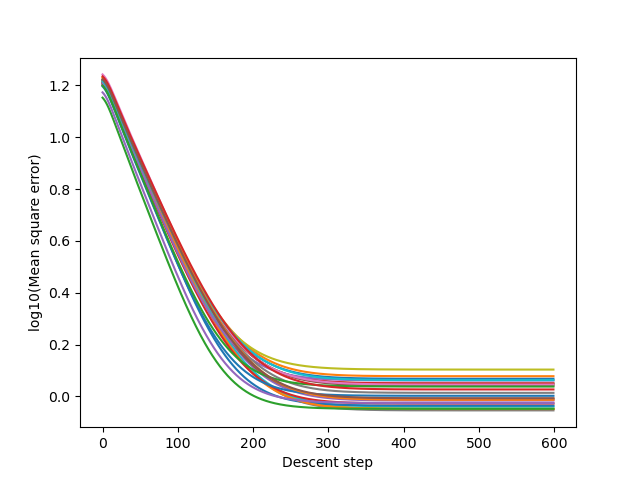

In [5]:
iq0 = ImageQuant2(img=imgs, roi=rois)
iq0.quantify(**kwargs_dict)
res0 = iq0.compile_res()
iq0.plot_losses(log=True)

### Quantification 1

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<03:31,  2.84it/s]

  2%|█▋                                                                                                            | 9/600 [00:00<00:23, 24.98it/s]

  3%|███                                                                                                          | 17/600 [00:00<00:14, 40.63it/s]

  4%|████▌                                                                                                        | 25/600 [00:00<00:11, 51.02it/s]

  6%|█████▉                                                                                                       | 33/600 [00:00<00:09, 58.85it/s]

  7%|███████▍                                                                                                     | 41/600 [00:00<00:08, 63.65it/s]

  8%|█████████                                                                                                    | 50/600 [00:00<00:08, 68.28it/s]

 10%|██████████▌                                                                                                  | 58/600 [00:01<00:07, 71.56it/s]

 11%|███████████▉                                                                                                 | 66/600 [00:01<00:07, 73.27it/s]

 12%|█████████████▍                                                                                               | 74/600 [00:01<00:07, 73.26it/s]

 14%|██████████████▉                                                                                              | 82/600 [00:01<00:06, 74.73it/s]

 15%|████████████████▎                                                                                            | 90/600 [00:01<00:06, 75.80it/s]

 16%|█████████████████▊                                                                                           | 98/600 [00:01<00:06, 76.45it/s]

 18%|███████████████████                                                                                         | 106/600 [00:01<00:06, 77.03it/s]

 19%|████████████████████▌                                                                                       | 114/600 [00:01<00:06, 75.59it/s]

 20%|█████████████████████▉                                                                                      | 122/600 [00:01<00:06, 73.89it/s]

 22%|███████████████████████▍                                                                                    | 130/600 [00:02<00:06, 71.02it/s]

 23%|████████████████████████▊                                                                                   | 138/600 [00:02<00:06, 71.59it/s]

 24%|██████████████████████████▎                                                                                 | 146/600 [00:02<00:06, 73.81it/s]

 26%|███████████████████████████▉                                                                                | 155/600 [00:02<00:05, 77.74it/s]

 28%|█████████████████████████████▋                                                                              | 165/600 [00:02<00:05, 83.02it/s]

 29%|███████████████████████████████▎                                                                            | 174/600 [00:02<00:05, 82.23it/s]

 31%|█████████████████████████████████                                                                           | 184/600 [00:02<00:04, 85.49it/s]

 32%|██████████████████████████████████▋                                                                         | 193/600 [00:02<00:04, 84.58it/s]

 34%|████████████████████████████████████▎                                                                       | 202/600 [00:02<00:04, 82.48it/s]

 35%|█████████████████████████████████████▉                                                                      | 211/600 [00:03<00:04, 81.85it/s]

 37%|███████████████████████████████████████▌                                                                    | 220/600 [00:03<00:04, 81.39it/s]

 38%|█████████████████████████████████████████▏                                                                  | 229/600 [00:03<00:04, 81.07it/s]

 40%|██████████████████████████████████████████▊                                                                 | 238/600 [00:03<00:04, 80.37it/s]

 41%|████████████████████████████████████████████▍                                                               | 247/600 [00:03<00:04, 79.63it/s]

 42%|█████████████████████████████████████████████▉                                                              | 255/600 [00:03<00:04, 79.42it/s]

 44%|███████████████████████████████████████████████▋                                                            | 265/600 [00:03<00:04, 83.17it/s]

 46%|█████████████████████████████████████████████████▎                                                          | 274/600 [00:03<00:03, 83.16it/s]

 47%|██████████████████████████████████████████████████▉                                                         | 283/600 [00:03<00:03, 82.46it/s]

 49%|████████████████████████████████████████████████████▌                                                       | 292/600 [00:04<00:03, 80.94it/s]

 50%|██████████████████████████████████████████████████████▏                                                     | 301/600 [00:04<00:03, 81.52it/s]

 52%|███████████████████████████████████████████████████████▊                                                    | 310/600 [00:04<00:03, 81.61it/s]

 53%|█████████████████████████████████████████████████████████▍                                                  | 319/600 [00:04<00:03, 80.76it/s]

 55%|███████████████████████████████████████████████████████████                                                 | 328/600 [00:04<00:03, 79.77it/s]

 56%|████████████████████████████████████████████████████████████▍                                               | 336/600 [00:04<00:03, 79.74it/s]

 57%|█████████████████████████████████████████████████████████████▉                                              | 344/600 [00:04<00:03, 78.07it/s]

 59%|███████████████████████████████████████████████████████████████▌                                            | 353/600 [00:04<00:03, 78.74it/s]

 60%|████████████████████████████████████████████████████████████████▉                                           | 361/600 [00:04<00:03, 78.43it/s]

 62%|██████████████████████████████████████████████████████████████████▍                                         | 369/600 [00:05<00:03, 76.96it/s]

 63%|███████████████████████████████████████████████████████████████████▊                                        | 377/600 [00:05<00:03, 72.17it/s]

 64%|█████████████████████████████████████████████████████████████████████▎                                      | 385/600 [00:05<00:02, 73.16it/s]

 66%|███████████████████████████████████████████████████████████████████████                                     | 395/600 [00:05<00:02, 78.81it/s]

 67%|████████████████████████████████████████████████████████████████████████▋                                   | 404/600 [00:05<00:02, 79.47it/s]

 69%|██████████████████████████████████████████████████████████████████████████▏                                 | 412/600 [00:05<00:02, 77.73it/s]

 70%|███████████████████████████████████████████████████████████████████████████▌                                | 420/600 [00:05<00:02, 76.98it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▏                              | 429/600 [00:05<00:02, 77.66it/s]

 73%|██████████████████████████████████████████████████████████████████████████████▋                             | 437/600 [00:05<00:02, 78.05it/s]

 74%|████████████████████████████████████████████████████████████████████████████████                            | 445/600 [00:05<00:01, 78.04it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████▌                          | 453/600 [00:06<00:01, 76.00it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▉                         | 461/600 [00:06<00:01, 76.89it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████▍                       | 469/600 [00:06<00:01, 77.12it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▊                      | 477/600 [00:06<00:01, 77.76it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████▎                    | 485/600 [00:06<00:01, 77.97it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████▋                   | 493/600 [00:06<00:01, 78.32it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▏                 | 501/600 [00:06<00:01, 78.17it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████▌                | 509/600 [00:06<00:01, 77.87it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████               | 517/600 [00:06<00:01, 78.04it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████▌             | 525/600 [00:07<00:00, 78.14it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████▉            | 533/600 [00:07<00:00, 77.74it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████▍          | 541/600 [00:07<00:00, 76.77it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊         | 549/600 [00:07<00:00, 77.57it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 557/600 [00:07<00:00, 77.85it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 566/600 [00:07<00:00, 80.56it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 575/600 [00:07<00:00, 78.15it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 583/600 [00:07<00:00, 78.59it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 591/600 [00:07<00:00, 75.77it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 599/600 [00:07<00:00, 73.75it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 74.85it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

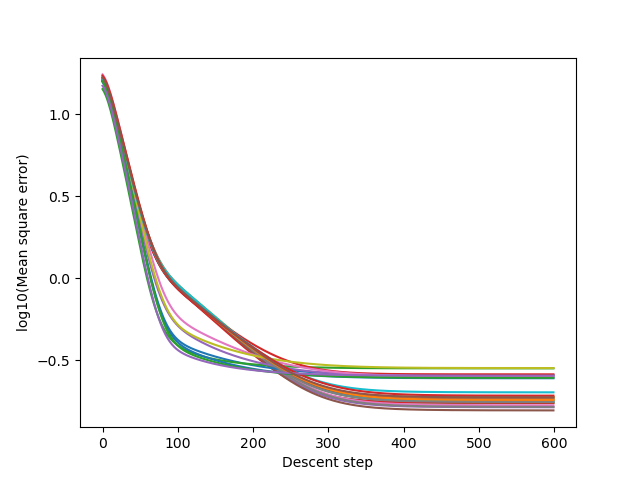

In [6]:
iq1 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg1)
iq1.quantify(**kwargs_dict)
res1 = iq1.compile_res()
iq1.plot_losses(log=True)

### Quantification 2

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<06:58,  1.43it/s]

  1%|█▍                                                                                                            | 8/600 [00:00<00:45, 12.89it/s]

  2%|██▌                                                                                                          | 14/600 [00:00<00:27, 21.63it/s]

  4%|███▊                                                                                                         | 21/600 [00:01<00:18, 31.03it/s]

  5%|█████                                                                                                        | 28/600 [00:01<00:14, 39.13it/s]

  6%|██████▏                                                                                                      | 34/600 [00:01<00:13, 42.45it/s]

  7%|███████▎                                                                                                     | 40/600 [00:01<00:12, 45.53it/s]

  8%|████████▎                                                                                                    | 46/600 [00:01<00:11, 48.30it/s]

  9%|█████████▍                                                                                                   | 52/600 [00:01<00:10, 49.88it/s]

 10%|██████████▌                                                                                                  | 58/600 [00:01<00:10, 51.26it/s]

 11%|███████████▋                                                                                                 | 64/600 [00:01<00:10, 51.87it/s]

 12%|████████████▉                                                                                                | 71/600 [00:01<00:09, 55.90it/s]

 13%|██████████████▏                                                                                              | 78/600 [00:02<00:09, 57.13it/s]

 14%|███████████████▍                                                                                             | 85/600 [00:02<00:08, 58.74it/s]

 15%|████████████████▌                                                                                            | 91/600 [00:02<00:09, 56.53it/s]

 16%|█████████████████▊                                                                                           | 98/600 [00:02<00:08, 59.32it/s]

 18%|███████████████████                                                                                         | 106/600 [00:02<00:07, 63.31it/s]

 19%|████████████████████▎                                                                                       | 113/600 [00:02<00:07, 64.79it/s]

 20%|█████████████████████▉                                                                                      | 122/600 [00:02<00:06, 69.40it/s]

 22%|███████████████████████▏                                                                                    | 129/600 [00:02<00:06, 68.72it/s]

 23%|████████████████████████▊                                                                                   | 138/600 [00:02<00:06, 72.29it/s]

 24%|██████████████████████████▎                                                                                 | 146/600 [00:03<00:06, 73.74it/s]

 26%|███████████████████████████▋                                                                                | 154/600 [00:03<00:06, 74.09it/s]

 27%|█████████████████████████████▏                                                                              | 162/600 [00:03<00:05, 74.28it/s]

 28%|██████████████████████████████▌                                                                             | 170/600 [00:03<00:05, 74.12it/s]

 30%|████████████████████████████████                                                                            | 178/600 [00:03<00:05, 74.94it/s]

 31%|█████████████████████████████████▍                                                                          | 186/600 [00:03<00:05, 76.34it/s]

 32%|███████████████████████████████████                                                                         | 195/600 [00:03<00:05, 77.66it/s]

 34%|████████████████████████████████████▌                                                                       | 203/600 [00:03<00:05, 77.91it/s]

 35%|█████████████████████████████████████▉                                                                      | 211/600 [00:03<00:05, 77.47it/s]

 37%|███████████████████████████████████████▌                                                                    | 220/600 [00:03<00:04, 78.72it/s]

 38%|█████████████████████████████████████████▏                                                                  | 229/600 [00:04<00:04, 78.90it/s]

 40%|██████████████████████████████████████████▊                                                                 | 238/600 [00:04<00:04, 79.50it/s]

 41%|████████████████████████████████████████████▎                                                               | 246/600 [00:04<00:04, 79.18it/s]

 42%|█████████████████████████████████████████████▋                                                              | 254/600 [00:04<00:04, 77.93it/s]

 44%|███████████████████████████████████████████████▏                                                            | 262/600 [00:04<00:04, 77.23it/s]

 45%|████████████████████████████████████████████████▌                                                           | 270/600 [00:04<00:04, 77.14it/s]

 46%|██████████████████████████████████████████████████                                                          | 278/600 [00:04<00:04, 76.18it/s]

 48%|███████████████████████████████████████████████████▋                                                        | 287/600 [00:04<00:04, 77.13it/s]

 49%|█████████████████████████████████████████████████████                                                       | 295/600 [00:04<00:03, 77.68it/s]

 50%|██████████████████████████████████████████████████████▌                                                     | 303/600 [00:05<00:03, 78.25it/s]

 52%|███████████████████████████████████████████████████████▉                                                    | 311/600 [00:05<00:03, 77.71it/s]

 53%|█████████████████████████████████████████████████████████▍                                                  | 319/600 [00:05<00:03, 70.33it/s]

 55%|██████████████████████████████████████████████████████████▊                                                 | 327/600 [00:05<00:03, 72.06it/s]

 56%|████████████████████████████████████████████████████████████▍                                               | 336/600 [00:05<00:03, 74.72it/s]

 57%|█████████████████████████████████████████████████████████████▉                                              | 344/600 [00:05<00:03, 72.60it/s]

 59%|███████████████████████████████████████████████████████████████▎                                            | 352/600 [00:05<00:03, 69.59it/s]

 60%|████████████████████████████████████████████████████████████████▊                                           | 360/600 [00:05<00:03, 68.14it/s]

 61%|██████████████████████████████████████████████████████████████████▏                                         | 368/600 [00:05<00:03, 69.50it/s]

 63%|███████████████████████████████████████████████████████████████████▋                                        | 376/600 [00:06<00:03, 70.41it/s]

 64%|█████████████████████████████████████████████████████████████████████                                       | 384/600 [00:06<00:03, 68.27it/s]

 65%|██████████████████████████████████████████████████████████████████████▍                                     | 391/600 [00:06<00:03, 67.40it/s]

 66%|███████████████████████████████████████████████████████████████████████▋                                    | 398/600 [00:06<00:03, 63.24it/s]

 68%|█████████████████████████████████████████████████████████████████████████                                   | 406/600 [00:06<00:02, 66.06it/s]

 69%|██████████████████████████████████████████████████████████████████████████▌                                 | 414/600 [00:06<00:02, 67.63it/s]

 70%|███████████████████████████████████████████████████████████████████████████▉                                | 422/600 [00:06<00:02, 70.19it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▍                              | 430/600 [00:06<00:02, 69.72it/s]

 73%|███████████████████████████████████████████████████████████████████████████████                             | 439/600 [00:06<00:02, 74.62it/s]

 75%|████████████████████████████████████████████████████████████████████████████████▋                           | 448/600 [00:07<00:01, 77.45it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████                          | 456/600 [00:07<00:01, 75.92it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████▌                        | 464/600 [00:07<00:02, 67.10it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████▉                       | 472/600 [00:07<00:01, 68.06it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████▍                     | 480/600 [00:07<00:01, 69.14it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████▊                    | 488/600 [00:07<00:01, 70.20it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████▎                  | 496/600 [00:07<00:01, 70.52it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▋                 | 504/600 [00:07<00:01, 70.48it/s]

 85%|████████████████████████████████████████████████████████████████████████████████████████████▏               | 512/600 [00:08<00:01, 72.14it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████▌              | 520/600 [00:08<00:01, 72.15it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████             | 528/600 [00:08<00:00, 72.41it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████▍           | 536/600 [00:08<00:00, 70.51it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████▉          | 544/600 [00:08<00:00, 70.50it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████▎        | 552/600 [00:08<00:00, 69.99it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 560/600 [00:08<00:00, 67.90it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████      | 567/600 [00:08<00:00, 55.12it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 573/600 [00:09<00:00, 47.18it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 579/600 [00:09<00:00, 36.53it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████   | 584/600 [00:09<00:00, 36.41it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████  | 589/600 [00:09<00:00, 38.42it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 597/600 [00:09<00:00, 46.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 61.50it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

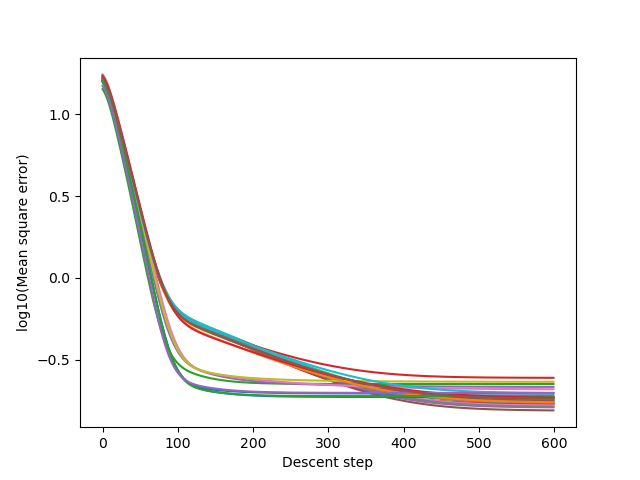

In [7]:
iq2 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg2)
iq2.quantify(**kwargs_dict)
res2 = iq2.compile_res()
iq2.plot_losses(log=True)

### Quantification 3

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<03:44,  2.67it/s]

  2%|█▋                                                                                                            | 9/600 [00:00<00:25, 23.42it/s]

  3%|██▉                                                                                                          | 16/600 [00:00<00:16, 36.29it/s]

  4%|████▎                                                                                                        | 24/600 [00:00<00:11, 48.03it/s]

  5%|█████▊                                                                                                       | 32/600 [00:00<00:10, 56.34it/s]

  7%|███████▎                                                                                                     | 40/600 [00:00<00:09, 62.04it/s]

  8%|████████▋                                                                                                    | 48/600 [00:01<00:08, 65.36it/s]

  9%|██████████▏                                                                                                  | 56/600 [00:01<00:08, 67.95it/s]

 11%|███████████▋                                                                                                 | 64/600 [00:01<00:07, 67.92it/s]

 12%|█████████████                                                                                                | 72/600 [00:01<00:07, 69.79it/s]

 13%|██████████████▌                                                                                              | 80/600 [00:01<00:07, 71.90it/s]

 15%|███████████████▉                                                                                             | 88/600 [00:01<00:07, 71.58it/s]

 16%|█████████████████▍                                                                                           | 96/600 [00:01<00:07, 70.61it/s]

 17%|██████████████████▋                                                                                         | 104/600 [00:01<00:06, 72.54it/s]

 19%|████████████████████▏                                                                                       | 112/600 [00:01<00:06, 72.41it/s]

 20%|█████████████████████▌                                                                                      | 120/600 [00:02<00:06, 72.00it/s]

 21%|███████████████████████                                                                                     | 128/600 [00:02<00:06, 72.54it/s]

 23%|████████████████████████▍                                                                                   | 136/600 [00:02<00:06, 72.35it/s]

 24%|█████████████████████████▉                                                                                  | 144/600 [00:02<00:06, 72.24it/s]

 25%|███████████████████████████▎                                                                                | 152/600 [00:02<00:06, 71.99it/s]

 27%|████████████████████████████▊                                                                               | 160/600 [00:02<00:06, 72.72it/s]

 28%|██████████████████████████████▏                                                                             | 168/600 [00:02<00:06, 71.19it/s]

 30%|███████████████████████████████▊                                                                            | 177/600 [00:02<00:05, 75.53it/s]

 31%|█████████████████████████████████▍                                                                          | 186/600 [00:02<00:05, 76.57it/s]

 32%|██████████████████████████████████▉                                                                         | 194/600 [00:03<00:05, 74.55it/s]

 34%|████████████████████████████████████▎                                                                       | 202/600 [00:03<00:05, 75.48it/s]

 35%|█████████████████████████████████████▊                                                                      | 210/600 [00:03<00:05, 75.58it/s]

 36%|███████████████████████████████████████▏                                                                    | 218/600 [00:03<00:05, 74.86it/s]

 38%|████████████████████████████████████████▋                                                                   | 226/600 [00:03<00:04, 74.97it/s]

 39%|██████████████████████████████████████████                                                                  | 234/600 [00:03<00:04, 75.14it/s]

 40%|███████████████████████████████████████████▌                                                                | 242/600 [00:03<00:04, 75.27it/s]

 42%|█████████████████████████████████████████████                                                               | 250/600 [00:03<00:04, 72.36it/s]

 43%|██████████████████████████████████████████████▍                                                             | 258/600 [00:03<00:04, 73.26it/s]

 44%|███████████████████████████████████████████████▉                                                            | 266/600 [00:03<00:04, 73.67it/s]

 46%|█████████████████████████████████████████████████▎                                                          | 274/600 [00:04<00:04, 72.07it/s]

 47%|██████████████████████████████████████████████████▊                                                         | 282/600 [00:04<00:04, 72.48it/s]

 48%|████████████████████████████████████████████████████▏                                                       | 290/600 [00:04<00:04, 73.05it/s]

 50%|█████████████████████████████████████████████████████▋                                                      | 298/600 [00:04<00:04, 71.41it/s]

 51%|███████████████████████████████████████████████████████                                                     | 306/600 [00:04<00:04, 72.63it/s]

 52%|████████████████████████████████████████████████████████▌                                                   | 314/600 [00:04<00:03, 72.32it/s]

 54%|█████████████████████████████████████████████████████████▉                                                  | 322/600 [00:04<00:03, 72.27it/s]

 55%|███████████████████████████████████████████████████████████▍                                                | 330/600 [00:04<00:03, 70.67it/s]

 56%|████████████████████████████████████████████████████████████▊                                               | 338/600 [00:04<00:03, 70.65it/s]

 58%|██████████████████████████████████████████████████████████████▎                                             | 346/600 [00:05<00:03, 70.42it/s]

 59%|███████████████████████████████████████████████████████████████▋                                            | 354/600 [00:05<00:03, 71.85it/s]

 60%|█████████████████████████████████████████████████████████████████▏                                          | 362/600 [00:05<00:03, 72.90it/s]

 62%|██████████████████████████████████████████████████████████████████▌                                         | 370/600 [00:05<00:03, 70.20it/s]

 63%|████████████████████████████████████████████████████████████████████                                        | 378/600 [00:05<00:03, 69.59it/s]

 64%|█████████████████████████████████████████████████████████████████████▎                                      | 385/600 [00:05<00:03, 66.41it/s]

 65%|██████████████████████████████████████████████████████████████████████▌                                     | 392/600 [00:05<00:03, 64.29it/s]

 66%|███████████████████████████████████████████████████████████████████████▊                                    | 399/600 [00:05<00:03, 62.99it/s]

 68%|█████████████████████████████████████████████████████████████████████████                                   | 406/600 [00:06<00:03, 59.08it/s]

 69%|██████████████████████████████████████████████████████████████████████████▏                                 | 412/600 [00:06<00:03, 57.61it/s]

 70%|███████████████████████████████████████████████████████████████████████████▏                                | 418/600 [00:06<00:03, 57.50it/s]

 71%|████████████████████████████████████████████████████████████████████████████▋                               | 426/600 [00:06<00:02, 62.65it/s]

 72%|██████████████████████████████████████████████████████████████████████████████                              | 434/600 [00:06<00:02, 66.43it/s]

 74%|███████████████████████████████████████████████████████████████████████████████▍                            | 441/600 [00:06<00:02, 66.49it/s]

 75%|████████████████████████████████████████████████████████████████████████████████▊                           | 449/600 [00:06<00:02, 69.93it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████▎                         | 457/600 [00:06<00:02, 70.39it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████▋                        | 465/600 [00:06<00:01, 72.37it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████▏                      | 473/600 [00:06<00:01, 73.22it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████▌                     | 481/600 [00:07<00:01, 71.92it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████                    | 489/600 [00:07<00:01, 72.49it/s]

 83%|█████████████████████████████████████████████████████████████████████████████████████████▍                  | 497/600 [00:07<00:01, 73.40it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▉                 | 505/600 [00:07<00:01, 73.08it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████▎               | 513/600 [00:07<00:01, 73.72it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████▊              | 521/600 [00:07<00:01, 74.50it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████▏            | 529/600 [00:07<00:00, 74.40it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████▋           | 537/600 [00:07<00:00, 74.33it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████          | 545/600 [00:07<00:00, 74.95it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████▌        | 553/600 [00:08<00:00, 72.75it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 561/600 [00:08<00:00, 73.94it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 569/600 [00:08<00:00, 72.91it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████    | 578/600 [00:08<00:00, 75.95it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 586/600 [00:08<00:00, 73.48it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 594/600 [00:08<00:00, 69.20it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:08<00:00, 68.41it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

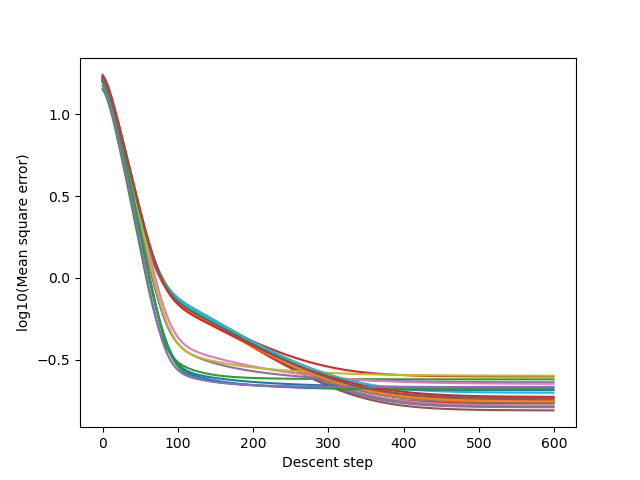

In [8]:
iq3 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg3)
iq3.quantify(**kwargs_dict)
res3 = iq3.compile_res()
iq3.plot_losses(log=True)

### Quantification 4

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<04:08,  2.41it/s]

  1%|█▎                                                                                                            | 7/600 [00:00<00:35, 16.53it/s]

  2%|██▎                                                                                                          | 13/600 [00:00<00:21, 27.42it/s]

  3%|███▋                                                                                                         | 20/600 [00:00<00:15, 37.36it/s]

  5%|█████                                                                                                        | 28/600 [00:00<00:12, 46.78it/s]

  6%|██████▏                                                                                                      | 34/600 [00:00<00:11, 50.13it/s]

  7%|███████▎                                                                                                     | 40/600 [00:01<00:12, 45.56it/s]

  8%|████████▎                                                                                                    | 46/600 [00:01<00:17, 31.31it/s]

  8%|█████████▎                                                                                                   | 51/600 [00:01<00:16, 34.09it/s]

 10%|██████████▋                                                                                                  | 59/600 [00:01<00:12, 43.20it/s]

 11%|███████████▊                                                                                                 | 65/600 [00:01<00:11, 46.78it/s]

 12%|█████████████▎                                                                                               | 73/600 [00:01<00:09, 54.42it/s]

 13%|██████████████▌                                                                                              | 80/600 [00:01<00:09, 56.69it/s]

 14%|███████████████▊                                                                                             | 87/600 [00:02<00:10, 46.81it/s]

 16%|████████████████▉                                                                                            | 93/600 [00:02<00:15, 32.77it/s]

 16%|█████████████████▊                                                                                           | 98/600 [00:02<00:16, 30.44it/s]

 17%|██████████████████▎                                                                                         | 102/600 [00:02<00:17, 28.54it/s]

 18%|███████████████████                                                                                         | 106/600 [00:03<00:19, 25.42it/s]

 18%|███████████████████▊                                                                                        | 110/600 [00:03<00:17, 27.85it/s]

 19%|████████████████████▌                                                                                       | 114/600 [00:03<00:16, 29.75it/s]

 20%|█████████████████████▏                                                                                      | 118/600 [00:03<00:15, 31.85it/s]

 20%|██████████████████████▏                                                                                     | 123/600 [00:03<00:15, 31.07it/s]

 21%|███████████████████████                                                                                     | 128/600 [00:03<00:13, 34.75it/s]

 23%|████████████████████████▋                                                                                   | 137/600 [00:03<00:09, 46.58it/s]

 24%|██████████████████████████                                                                                  | 145/600 [00:03<00:08, 54.54it/s]

 26%|███████████████████████████▋                                                                                | 154/600 [00:04<00:07, 63.36it/s]

 27%|████████████████████████████▉                                                                               | 161/600 [00:04<00:07, 62.06it/s]

 28%|██████████████████████████████▏                                                                             | 168/600 [00:04<00:06, 62.59it/s]

 29%|███████████████████████████████▌                                                                            | 175/600 [00:04<00:08, 48.53it/s]

 30%|████████████████████████████████▌                                                                           | 181/600 [00:04<00:08, 50.63it/s]

 31%|█████████████████████████████████▊                                                                          | 188/600 [00:04<00:07, 54.88it/s]

 32%|██████████████████████████████████▉                                                                         | 194/600 [00:04<00:07, 54.07it/s]

 33%|████████████████████████████████████                                                                        | 200/600 [00:04<00:07, 51.57it/s]

 35%|█████████████████████████████████████▍                                                                      | 208/600 [00:05<00:06, 57.20it/s]

 36%|██████████████████████████████████████▉                                                                     | 216/600 [00:05<00:06, 62.03it/s]

 37%|████████████████████████████████████████▎                                                                   | 224/600 [00:05<00:05, 65.71it/s]

 39%|█████████████████████████████████████████▊                                                                  | 232/600 [00:05<00:05, 66.73it/s]

 40%|███████████████████████████████████████████                                                                 | 239/600 [00:05<00:05, 66.42it/s]

 41%|████████████████████████████████████████████▍                                                               | 247/600 [00:05<00:05, 67.85it/s]

 42%|█████████████████████████████████████████████▉                                                              | 255/600 [00:05<00:04, 69.42it/s]

 44%|███████████████████████████████████████████████▎                                                            | 263/600 [00:05<00:04, 70.86it/s]

 45%|████████████████████████████████████████████████▊                                                           | 271/600 [00:05<00:04, 70.60it/s]

 46%|██████████████████████████████████████████████████▏                                                         | 279/600 [00:06<00:04, 70.70it/s]

 48%|███████████████████████████████████████████████████▋                                                        | 287/600 [00:06<00:04, 72.08it/s]

 49%|█████████████████████████████████████████████████████                                                       | 295/600 [00:06<00:04, 64.09it/s]

 50%|██████████████████████████████████████████████████████▌                                                     | 303/600 [00:06<00:04, 67.12it/s]

 52%|███████████████████████████████████████████████████████▊                                                    | 310/600 [00:06<00:04, 67.65it/s]

 53%|█████████████████████████████████████████████████████████                                                   | 317/600 [00:06<00:04, 67.27it/s]

 54%|██████████████████████████████████████████████████████████▍                                                 | 325/600 [00:06<00:04, 68.61it/s]

 55%|███████████████████████████████████████████████████████████▊                                                | 332/600 [00:06<00:04, 60.69it/s]

 56%|█████████████████████████████████████████████████████████████                                               | 339/600 [00:06<00:04, 61.03it/s]

 58%|██████████████████████████████████████████████████████████████▎                                             | 346/600 [00:07<00:04, 60.03it/s]

 59%|███████████████████████████████████████████████████████████████▌                                            | 353/600 [00:07<00:04, 59.09it/s]

 60%|████████████████████████████████████████████████████████████████▊                                           | 360/600 [00:07<00:03, 61.65it/s]

 61%|██████████████████████████████████████████████████████████████████                                          | 367/600 [00:07<00:03, 62.84it/s]

 62%|███████████████████████████████████████████████████████████████████▎                                        | 374/600 [00:07<00:03, 64.44it/s]

 64%|████████████████████████████████████████████████████████████████████▊                                       | 382/600 [00:07<00:03, 67.87it/s]

 65%|██████████████████████████████████████████████████████████████████████                                      | 389/600 [00:07<00:03, 68.28it/s]

 66%|███████████████████████████████████████████████████████████████████████▍                                    | 397/600 [00:07<00:02, 70.40it/s]

 68%|████████████████████████████████████████████████████████████████████████▉                                   | 405/600 [00:07<00:02, 71.09it/s]

 69%|██████████████████████████████████████████████████████████████████████████▎                                 | 413/600 [00:08<00:02, 69.63it/s]

 70%|███████████████████████████████████████████████████████████████████████████▊                                | 421/600 [00:08<00:02, 68.85it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▏                              | 429/600 [00:08<00:02, 70.50it/s]

 73%|██████████████████████████████████████████████████████████████████████████████▋                             | 437/600 [00:08<00:02, 69.66it/s]

 74%|███████████████████████████████████████████████████████████████████████████████▉                            | 444/600 [00:08<00:02, 68.89it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████▌                          | 453/600 [00:08<00:01, 73.76it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▉                         | 461/600 [00:08<00:01, 72.05it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████▍                       | 469/600 [00:08<00:01, 73.89it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▊                      | 477/600 [00:08<00:01, 72.73it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████▎                    | 485/600 [00:09<00:01, 73.16it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████▋                   | 493/600 [00:09<00:01, 71.81it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▏                 | 501/600 [00:09<00:01, 72.19it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████▌                | 509/600 [00:09<00:01, 73.80it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████               | 517/600 [00:09<00:01, 74.39it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████▌             | 525/600 [00:09<00:01, 72.55it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████▉            | 533/600 [00:09<00:00, 71.63it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████▍          | 541/600 [00:09<00:00, 72.32it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊         | 549/600 [00:09<00:00, 70.41it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 557/600 [00:10<00:00, 70.91it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 565/600 [00:10<00:00, 71.52it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 573/600 [00:10<00:00, 71.89it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 581/600 [00:10<00:00, 71.74it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████  | 589/600 [00:10<00:00, 70.68it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 597/600 [00:10<00:00, 69.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:10<00:00, 56.14it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

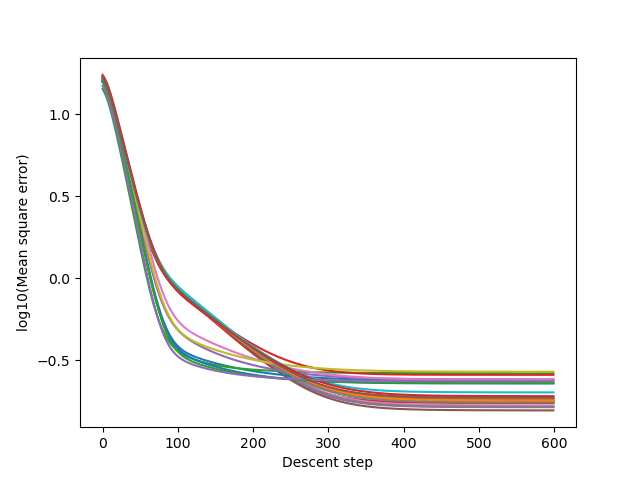

In [9]:
iq4 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg4)
iq4.quantify(**kwargs_dict)
res4 = iq4.compile_res()
iq4.plot_losses(log=True)

### Quantification 5

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<03:57,  2.52it/s]

  1%|█▍                                                                                                            | 8/600 [00:00<00:29, 20.32it/s]

  2%|██▋                                                                                                          | 15/600 [00:00<00:17, 33.39it/s]

  4%|███▉                                                                                                         | 22/600 [00:00<00:13, 41.50it/s]

  5%|█████▎                                                                                                       | 29/600 [00:00<00:11, 47.92it/s]

  6%|██████▌                                                                                                      | 36/600 [00:00<00:10, 53.94it/s]

  7%|███████▊                                                                                                     | 43/600 [00:01<00:09, 58.32it/s]

  8%|█████████                                                                                                    | 50/600 [00:01<00:09, 60.11it/s]

 10%|██████████▎                                                                                                  | 57/600 [00:01<00:08, 62.85it/s]

 11%|███████████▊                                                                                                 | 65/600 [00:01<00:08, 64.82it/s]

 12%|█████████████▎                                                                                               | 73/600 [00:01<00:07, 68.05it/s]

 13%|██████████████▌                                                                                              | 80/600 [00:01<00:07, 67.91it/s]

 14%|███████████████▊                                                                                             | 87/600 [00:01<00:08, 60.92it/s]

 16%|█████████████████                                                                                            | 94/600 [00:01<00:08, 59.91it/s]

 17%|██████████████████▎                                                                                         | 102/600 [00:01<00:07, 62.67it/s]

 18%|███████████████████▌                                                                                        | 109/600 [00:02<00:07, 64.21it/s]

 19%|████████████████████▉                                                                                       | 116/600 [00:02<00:07, 65.23it/s]

 20%|██████████████████████▏                                                                                     | 123/600 [00:02<00:07, 66.27it/s]

 22%|███████████████████████▍                                                                                    | 130/600 [00:02<00:07, 65.56it/s]

 23%|████████████████████████▊                                                                                   | 138/600 [00:02<00:06, 68.38it/s]

 24%|██████████████████████████                                                                                  | 145/600 [00:02<00:06, 68.69it/s]

 26%|███████████████████████████▌                                                                                | 153/600 [00:02<00:06, 69.83it/s]

 27%|████████████████████████████▉                                                                               | 161/600 [00:02<00:06, 68.96it/s]

 28%|██████████████████████████████▍                                                                             | 169/600 [00:02<00:06, 69.48it/s]

 30%|███████████████████████████████▊                                                                            | 177/600 [00:03<00:06, 70.31it/s]

 31%|█████████████████████████████████▎                                                                          | 185/600 [00:03<00:05, 69.69it/s]

 32%|██████████████████████████████████▌                                                                         | 192/600 [00:03<00:05, 68.71it/s]

 33%|███████████████████████████████████▊                                                                        | 199/600 [00:03<00:05, 69.00it/s]

 34%|█████████████████████████████████████▎                                                                      | 207/600 [00:03<00:05, 70.24it/s]

 36%|██████████████████████████████████████▋                                                                     | 215/600 [00:03<00:05, 67.86it/s]

 37%|████████████████████████████████████████▏                                                                   | 223/600 [00:03<00:05, 69.11it/s]

 38%|█████████████████████████████████████████▍                                                                  | 230/600 [00:03<00:05, 68.72it/s]

 40%|██████████████████████████████████████████▊                                                                 | 238/600 [00:03<00:05, 70.44it/s]

 41%|████████████████████████████████████████████▎                                                               | 246/600 [00:04<00:04, 71.02it/s]

 42%|█████████████████████████████████████████████▋                                                              | 254/600 [00:04<00:05, 68.76it/s]

 44%|██████████████████████████████████████████████▉                                                             | 261/600 [00:04<00:05, 67.67it/s]

 45%|████████████████████████████████████████████████▍                                                           | 269/600 [00:04<00:04, 68.57it/s]

 46%|█████████████████████████████████████████████████▋                                                          | 276/600 [00:04<00:04, 68.66it/s]

 47%|███████████████████████████████████████████████████                                                         | 284/600 [00:04<00:04, 69.71it/s]

 49%|████████████████████████████████████████████████████▌                                                       | 292/600 [00:04<00:04, 69.97it/s]

 50%|█████████████████████████████████████████████████████▊                                                      | 299/600 [00:04<00:04, 67.75it/s]

 51%|███████████████████████████████████████████████████████                                                     | 306/600 [00:04<00:04, 67.35it/s]

 52%|████████████████████████████████████████████████████████▌                                                   | 314/600 [00:05<00:04, 68.49it/s]

 54%|█████████████████████████████████████████████████████████▊                                                  | 321/600 [00:05<00:04, 68.45it/s]

 55%|███████████████████████████████████████████████████████████                                                 | 328/600 [00:05<00:03, 68.28it/s]

 56%|████████████████████████████████████████████████████████████▎                                               | 335/600 [00:05<00:03, 67.64it/s]

 57%|█████████████████████████████████████████████████████████████▌                                              | 342/600 [00:05<00:03, 66.26it/s]

 58%|███████████████████████████████████████████████████████████████                                             | 350/600 [00:05<00:03, 68.04it/s]

 60%|████████████████████████████████████████████████████████████████▎                                           | 357/600 [00:05<00:03, 63.37it/s]

 61%|█████████████████████████████████████████████████████████████████▌                                          | 364/600 [00:05<00:03, 59.92it/s]

 62%|██████████████████████████████████████████████████████████████████▊                                         | 371/600 [00:05<00:03, 62.44it/s]

 63%|████████████████████████████████████████████████████████████████████▏                                       | 379/600 [00:06<00:03, 65.30it/s]

 64%|█████████████████████████████████████████████████████████████████████▍                                      | 386/600 [00:06<00:03, 65.39it/s]

 66%|██████████████████████████████████████████████████████████████████████▋                                     | 393/600 [00:06<00:03, 66.63it/s]

 67%|████████████████████████████████████████████████████████████████████████                                    | 400/600 [00:06<00:02, 67.56it/s]

 68%|█████████████████████████████████████████████████████████████████████████▎                                  | 407/600 [00:06<00:02, 68.06it/s]

 69%|██████████████████████████████████████████████████████████████████████████▌                                 | 414/600 [00:06<00:02, 68.18it/s]

 70%|███████████████████████████████████████████████████████████████████████████▊                                | 421/600 [00:06<00:02, 66.79it/s]

 71%|█████████████████████████████████████████████████████████████████████████████                               | 428/600 [00:06<00:02, 67.35it/s]

 73%|██████████████████████████████████████████████████████████████████████████████▍                             | 436/600 [00:06<00:02, 68.74it/s]

 74%|███████████████████████████████████████████████████████████████████████████████▉                            | 444/600 [00:06<00:02, 70.07it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████▎                          | 452/600 [00:07<00:02, 70.39it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▊                         | 460/600 [00:07<00:02, 68.66it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████                        | 467/600 [00:07<00:02, 66.02it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████▌                      | 475/600 [00:07<00:01, 68.73it/s]

 81%|███████████████████████████████████████████████████████████████████████████████████████                     | 484/600 [00:07<00:01, 73.18it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████▋                   | 493/600 [00:07<00:01, 77.54it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▏                 | 501/600 [00:07<00:01, 73.35it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████▌                | 509/600 [00:07<00:01, 72.57it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████               | 517/600 [00:07<00:01, 72.12it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████▌             | 525/600 [00:08<00:01, 68.64it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████▉            | 533/600 [00:08<00:00, 69.42it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████▏          | 540/600 [00:08<00:00, 67.54it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████▋         | 548/600 [00:08<00:00, 68.93it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████▉        | 555/600 [00:08<00:00, 68.09it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 563/600 [00:08<00:00, 69.61it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 570/600 [00:08<00:00, 68.44it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 577/600 [00:08<00:00, 68.81it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 585/600 [00:08<00:00, 69.52it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 593/600 [00:09<00:00, 70.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 65.23it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

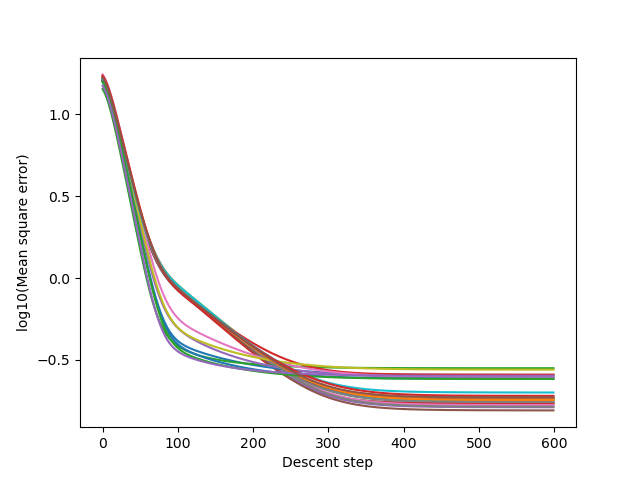

In [10]:
iq5 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg5)
iq5.quantify(**kwargs_dict)
res5 = iq5.compile_res()
iq5.plot_losses(log=True)

### Quantification 6

  0%|                                                                                                                      | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                             | 1/600 [00:00<04:21,  2.29it/s]

  1%|█▍                                                                                                            | 8/600 [00:00<00:31, 18.71it/s]

  2%|██▋                                                                                                          | 15/600 [00:00<00:18, 31.15it/s]

  4%|███▉                                                                                                         | 22/600 [00:00<00:13, 41.29it/s]

  5%|█████▎                                                                                                       | 29/600 [00:00<00:11, 48.57it/s]

  6%|██████▋                                                                                                      | 37/600 [00:00<00:10, 56.18it/s]

  7%|███████▉                                                                                                     | 44/600 [00:01<00:09, 59.67it/s]

  9%|█████████▍                                                                                                   | 52/600 [00:01<00:08, 63.34it/s]

 10%|███████████                                                                                                  | 61/600 [00:01<00:07, 70.08it/s]

 12%|████████████▋                                                                                                | 70/600 [00:01<00:06, 75.72it/s]

 13%|██████████████▏                                                                                              | 78/600 [00:01<00:06, 76.25it/s]

 14%|███████████████▌                                                                                             | 86/600 [00:01<00:06, 74.90it/s]

 16%|█████████████████                                                                                            | 94/600 [00:01<00:06, 75.08it/s]

 17%|██████████████████▎                                                                                         | 102/600 [00:01<00:06, 73.89it/s]

 18%|███████████████████▊                                                                                        | 110/600 [00:01<00:06, 71.19it/s]

 20%|█████████████████████▏                                                                                      | 118/600 [00:02<00:06, 72.16it/s]

 21%|██████████████████████▋                                                                                     | 126/600 [00:02<00:06, 68.14it/s]

 22%|████████████████████████                                                                                    | 134/600 [00:02<00:06, 69.10it/s]

 24%|█████████████████████████▌                                                                                  | 142/600 [00:02<00:06, 68.99it/s]

 25%|██████████████████████████▊                                                                                 | 149/600 [00:02<00:06, 69.20it/s]

 26%|████████████████████████████                                                                                | 156/600 [00:02<00:06, 67.75it/s]

 27%|█████████████████████████████▌                                                                              | 164/600 [00:02<00:06, 69.54it/s]

 29%|██████████████████████████████▉                                                                             | 172/600 [00:02<00:06, 70.87it/s]

 30%|████████████████████████████████▍                                                                           | 180/600 [00:02<00:05, 70.01it/s]

 31%|█████████████████████████████████▊                                                                          | 188/600 [00:03<00:05, 70.28it/s]

 33%|███████████████████████████████████▎                                                                        | 196/600 [00:03<00:05, 67.61it/s]

 34%|████████████████████████████████████▌                                                                       | 203/600 [00:03<00:05, 66.93it/s]

 35%|██████████████████████████████████████▏                                                                     | 212/600 [00:03<00:05, 71.28it/s]

 37%|███████████████████████████████████████▌                                                                    | 220/600 [00:03<00:05, 71.32it/s]

 38%|█████████████████████████████████████████                                                                   | 228/600 [00:03<00:05, 72.53it/s]

 39%|██████████████████████████████████████████▍                                                                 | 236/600 [00:03<00:05, 69.71it/s]

 41%|███████████████████████████████████████████▉                                                                | 244/600 [00:03<00:05, 70.50it/s]

 42%|█████████████████████████████████████████████▎                                                              | 252/600 [00:03<00:04, 70.56it/s]

 43%|██████████████████████████████████████████████▊                                                             | 260/600 [00:04<00:04, 70.83it/s]

 45%|████████████████████████████████████████████████▏                                                           | 268/600 [00:04<00:04, 69.70it/s]

 46%|█████████████████████████████████████████████████▌                                                          | 275/600 [00:04<00:05, 64.36it/s]

 47%|██████████████████████████████████████████████████▊                                                         | 282/600 [00:04<00:06, 52.85it/s]

 48%|███████████████████████████████████████████████████▊                                                        | 288/600 [00:04<00:06, 47.00it/s]

 49%|█████████████████████████████████████████████████████                                                       | 295/600 [00:04<00:05, 51.69it/s]

 50%|██████████████████████████████████████████████████████▏                                                     | 301/600 [00:04<00:05, 52.54it/s]

 51%|███████████████████████████████████████████████████████▎                                                    | 307/600 [00:05<00:05, 50.35it/s]

 52%|████████████████████████████████████████████████████████▌                                                   | 314/600 [00:05<00:05, 54.77it/s]

 53%|█████████████████████████████████████████████████████████▌                                                  | 320/600 [00:05<00:05, 49.60it/s]

 54%|██████████████████████████████████████████████████████████▋                                                 | 326/600 [00:05<00:05, 48.42it/s]

 55%|███████████████████████████████████████████████████████████▌                                                | 331/600 [00:05<00:05, 46.41it/s]

 56%|█████████████████████████████████████████████████████████████                                               | 339/600 [00:05<00:04, 53.78it/s]

 57%|██████████████████████████████████████████████████████████████                                              | 345/600 [00:05<00:05, 48.79it/s]

 59%|███████████████████████████████████████████████████████████████▌                                            | 353/600 [00:05<00:04, 55.26it/s]

 60%|████████████████████████████████████████████████████████████████▌                                           | 359/600 [00:06<00:04, 50.09it/s]

 61%|█████████████████████████████████████████████████████████████████▉                                          | 366/600 [00:06<00:04, 54.95it/s]

 62%|██████████████████████████████████████████████████████████████████▉                                         | 372/600 [00:06<00:04, 54.74it/s]

 64%|████████████████████████████████████████████████████████████████████▌                                       | 381/600 [00:06<00:03, 62.78it/s]

 65%|█████████████████████████████████████████████████████████████████████▊                                      | 388/600 [00:06<00:03, 62.53it/s]

 66%|███████████████████████████████████████████████████████████████████████▎                                    | 396/600 [00:06<00:03, 66.50it/s]

 68%|████████████████████████████████████████████████████████████████████████▉                                   | 405/600 [00:06<00:02, 72.10it/s]

 69%|██████████████████████████████████████████████████████████████████████████▎                                 | 413/600 [00:06<00:02, 68.08it/s]

 70%|████████████████████████████████████████████████████████████████████████████▏                               | 423/600 [00:06<00:02, 75.12it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▌                              | 431/600 [00:07<00:02, 74.96it/s]

 74%|███████████████████████████████████████████████████████████████████████████████▍                            | 441/600 [00:07<00:01, 80.77it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████                           | 450/600 [00:07<00:01, 77.45it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████▌                         | 459/600 [00:07<00:01, 78.88it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████▌                       | 470/600 [00:07<00:01, 84.94it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████▌                     | 481/600 [00:07<00:01, 90.16it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████▍                   | 491/600 [00:07<00:01, 92.30it/s]

 84%|██████████████████████████████████████████████████████████████████████████████████████████▏                 | 501/600 [00:07<00:01, 85.17it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████▊                | 510/600 [00:07<00:01, 83.97it/s]

 86%|█████████████████████████████████████████████████████████████████████████████████████████████▍              | 519/600 [00:08<00:01, 73.38it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████             | 528/600 [00:08<00:00, 76.24it/s]

 89%|████████████████████████████████████████████████████████████████████████████████████████████████▍           | 536/600 [00:08<00:00, 76.26it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████▎         | 546/600 [00:08<00:00, 81.09it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████▉        | 555/600 [00:08<00:00, 72.80it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 564/600 [00:08<00:00, 75.48it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 572/600 [00:08<00:00, 70.97it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 581/600 [00:08<00:00, 74.44it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████  | 589/600 [00:09<00:00, 70.35it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 598/600 [00:09<00:00, 75.08it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 65.20it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

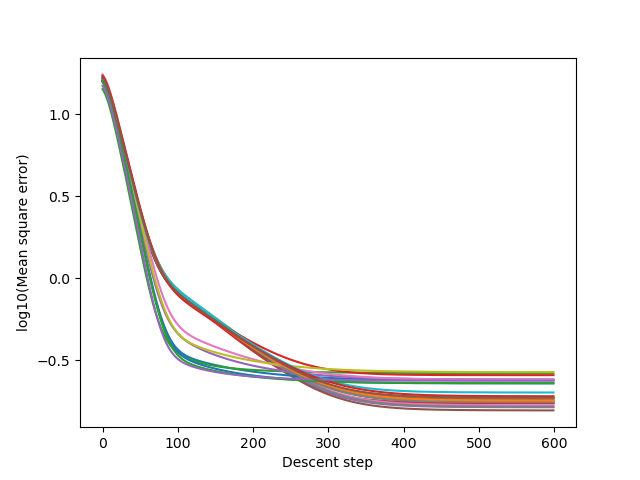

In [11]:
iq6 = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg6)
iq6.quantify(**kwargs_dict)
res6 = iq6.compile_res()
iq6.plot_losses(log=True)

### Get calibrations

In [12]:
def calculate_calibration(res):
    mems = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Membrane signal']))
    cyts = res.groupby('EmbryoID').apply(lambda x: np.mean(x['Cytoplasmic signal']))
    pre_post = [p.split('/')[-1] for p in paths]
    embryos = [p.split('/')[-2] for p in paths]
    lines = [p.split('/')[-3].split('_')[1] for p in paths]

    df_dict = {'Line': lines, 'Embryo': embryos, 'Exposure': pre_post, 'Membrane': mems, 'Cytoplasm': cyts}
    df = pd.DataFrame(df_dict)

    pre = df.groupby(['Line', 'Embryo']).last()
    post = df.groupby(['Line', 'Embryo']).first()
    df = pd.DataFrame({'mem_pre': pre.Membrane, 
                       'mem_post': post.Membrane, 'cyt_pre': pre.Cytoplasm, 
                       'cyt_post': post.Cytoplasm})
    df.to_csv('temp.csv')
    df = pd.read_csv('temp.csv')
    os.remove('temp.csv')
    return df

In [13]:
df0 = calculate_calibration(res0)
df1 = calculate_calibration(res1)
df2 = calculate_calibration(res2)
df3 = calculate_calibration(res3)
df4 = calculate_calibration(res4)
df5 = calculate_calibration(res5)
df6 = calculate_calibration(res6)

In [14]:
# Mean and standard deviation for all the calibrations

def calculate_mean_std(df):
    c = df[df.Line == 'sv2061'].apply(lambda x: ((x.cyt_pre - x.cyt_post) / (x.mem_post - x.mem_pre)) / 0.174, axis=1)
    return np.mean(c), np.std(c)

means, stds = zip(*[calculate_mean_std(df) for df in [df0, df1, df2, df3, df4, df5, df6]])
print(means[-1], stds[-1])
np.savetxt('../../data/calibration_constants.txt', means)

3.128136976235888 0.2799656557604893


In [15]:
# Saving full results for calibration 6 (will use later in a figure)
df6.to_csv('../../data/calibration_quantification6.csv')